# 📊 Data Exploration: Vitals, Labs, Demographics, and Cohort

In this notebook, we explore and summarize four key files from the ARMD dataset:

- `vitals` – Patient vital signs such as temperature, heart rate, blood pressure, etc.  
- `labs` – Laboratory results including WBC, creatinine, procalcitonin, and other infection markers.  
- `demographics` – Patient baseline information like age, gender, and socioeconomic indicators.  
- `cohort` – Culture orders and microbiology results including antibiotic susceptibility and organism type.

All four files will be **joined using the `order_proc_id_coded` column**, which uniquely identifies each culture order. This allows us to align vitals, labs, and demographic features to the corresponding microbiology result for supervised learning.

In [3]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = "../src/data/"

## 🩺 Vitals Data Exploration

This section explores the `vitals` file, which includes measurements such as heart rate, respiratory rate, temperature, systolic and diastolic blood pressure recorded before the culture was ordered. We will analyze missingness, distributions, and trends in these features.

### 📄 File: `microbiology_cultures_vitals.csv`

Based on the ARMD dataset description and supporting clinical paper, we will focus on the `median_` columns in this file as they provide a more stable and representative summary of the patient's condition prior to culture ordering.


In [6]:
# file path for vitals data and reading the CSV file
vitals_file = data_path + "microbiology_cultures_vitals.csv"
vitals_data = pd.read_csv(vitals_file)

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\130315295.py:3: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  vitals_data = pd.read_csv(vitals_file)


In [7]:
vitals_data.head()

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,Q25_heartrate,Q75_heartrate,median_heartrate,Q25_resprate,Q75_resprate,median_resprate,Q25_temp,...,first_diasbp,last_diasbp,last_sysbp,first_sysbp,last_temp,first_temp,last_resprate,first_resprate,last_heartrate,first_heartrate
0,JC2361817,131308278530,718222807,86.0,86.0,86.0,Null,Null,Null,Null,...,Null,80.0,109.0,Null,Null,Null,Null,Null,Null,86.0
1,JC2219930,131318072067,748261410,Null,Null,Null,Null,Null,Null,Null,...,75.0,75.0,121.0,121.0,Null,Null,Null,Null,Null,Null
2,JC2455425,131256420868,574712812,70.0,70.0,70.0,Null,Null,Null,Null,...,69.0,Null,Null,106.0,Null,Null,Null,Null,70.0,Null
3,JC1826078,131213257732,514463599,Null,Null,Null,Null,Null,Null,Null,...,90.0,90.0,120.0,120.0,Null,Null,Null,Null,Null,Null
4,JC1541734,131021676805,410407692,39.0,78.0,73.0,Null,Null,Null,Null,...,Null,42.0,62.0,Null,Null,Null,Null,Null,Null,80.0


In [9]:
vitals_data.shape

(4591374, 28)

In [8]:
vitals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   anon_id               object
 1   pat_enc_csn_id_coded  int64 
 2   order_proc_id_coded   int64 
 3   Q25_heartrate         object
 4   Q75_heartrate         object
 5   median_heartrate      object
 6   Q25_resprate          object
 7   Q75_resprate          object
 8   median_resprate       object
 9   Q25_temp              object
 10  Q75_temp              object
 11  median_temp           object
 12  Q25_sysbp             object
 13  Q75_sysbp             object
 14  median_sysbp          object
 15  Q25_diasbp            object
 16  Q75_diasbp            object
 17  median_diasbp         object
 18  first_diasbp          object
 19  last_diasbp           object
 20  last_sysbp            object
 21  first_sysbp           object
 22  last_temp             object
 23  first_temp            object
 24

In [23]:
# features that start with 'median_' are the ones we will focus on
median_columns = [col for col in vitals_data.columns if col.startswith('median_')]
# add order_proc_id_coded to the list of median columns
median_columns.append('order_proc_id_coded')
# filter the DataFrame to only include median columns
vitals_median_data = vitals_data[median_columns]
print(median_columns)
print(vitals_median_data.shape)

['median_heartrate', 'median_resprate', 'median_temp', 'median_sysbp', 'median_diasbp', 'order_proc_id_coded']
(4591374, 6)


In [24]:
# replace 'Null' with NaN for better handling of missing values
vitals_median_data = vitals_median_data.replace('Null', np.nan)

# check for missing values in the median columns
vitals_median_data.isnull().sum()

median_heartrate        19691
median_resprate        132159
median_temp             84386
median_sysbp            95495
median_diasbp           97166
order_proc_id_coded         0
dtype: int64

In [25]:
vitals_median_data.tail()

,median_heartrate,median_resprate,median_temp,median_sysbp,median_diasbp,order_proc_id_coded
4591369,103.0,20.0,95.36,135.0,80.0,791282965
4591370,94.0,18.0,99.86,142.0,88.0,790861816
4591371,94.0,18.0,99.86,142.0,88.0,790861818
4591372,60.0,20.0,99.68,131.0,60.0,779043709
4591373,69.0,20.0,99.68,NaN,NaN,804866307


In [26]:
vitals_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 6 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   median_heartrate     object
 1   median_resprate      object
 2   median_temp          object
 3   median_sysbp         object
 4   median_diasbp        object
 5   order_proc_id_coded  int64 
dtypes: int64(1), object(5)
memory usage: 210.2+ MB


In [27]:
# transform the data to numeric for analysis
vitals_median_data = vitals_median_data.apply(pd.to_numeric, errors='coerce')

# check the data types after conversion
vitals_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   median_heartrate     float64
 1   median_resprate      float64
 2   median_temp          float64
 3   median_sysbp         float64
 4   median_diasbp        float64
 5   order_proc_id_coded  int64  
dtypes: float64(5), int64(1)
memory usage: 210.2 MB


In [29]:
# check duplicates in the order_proc_id_coded column
duplicates = vitals_median_data['order_proc_id_coded'].duplicated().sum()
print(f"Number of duplicate order_proc_id_coded entries: {duplicates}")

Number of duplicate order_proc_id_coded entries: 4010034


In [35]:
# check rows of order_proc_id_coded = 790861816
order_cols = vitals_median_data[vitals_median_data['order_proc_id_coded'] == 790861816]
order_cols.shape

(60, 6)

In [36]:
order_cols.value_counts()

median_heartrate  median_resprate  median_temp  median_sysbp  median_diasbp  order_proc_id_coded
94.0              18.0             99.86        142.0         88.0           790861816              60
Name: count, dtype: int64

In [37]:
# after we found that values for each order_proc_id_coded rows are repeated, we can drop the duplicates
vitals_median_data = vitals_median_data.drop_duplicates(subset='order_proc_id_coded')
vitals_median_data.shape

(581340, 6)

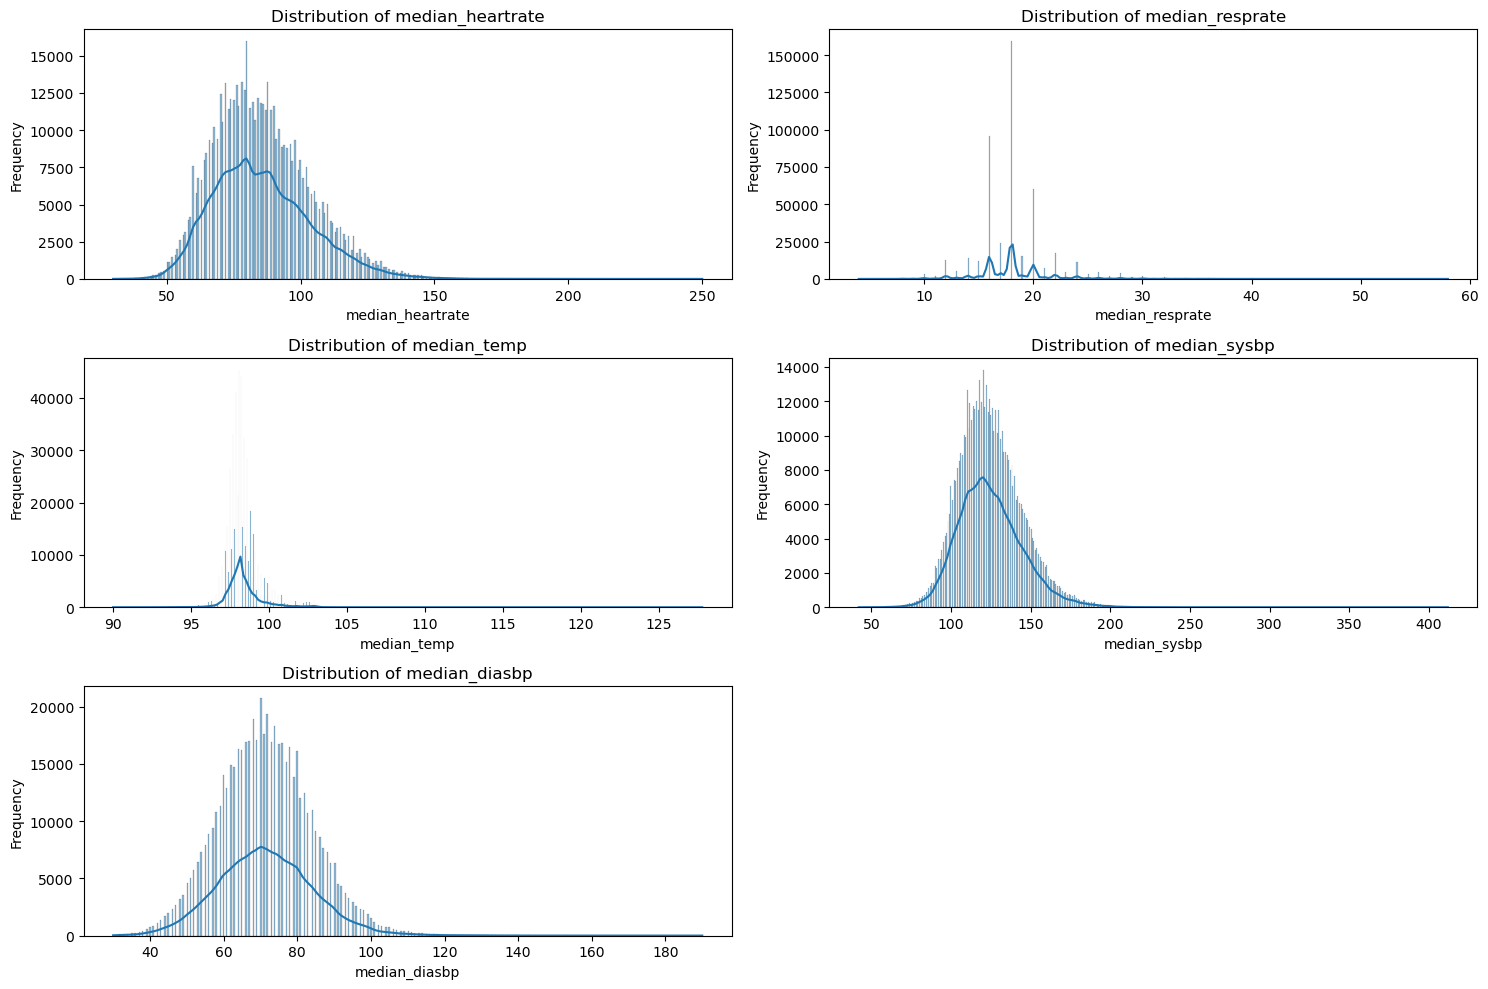

In [38]:
# plot distributions of the median features
plt.figure(figsize=(15, 10))
for i, column in enumerate(median_columns[:-1], 1):
    plt.subplot(3, 2, i)
    sns.histplot(vitals_median_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

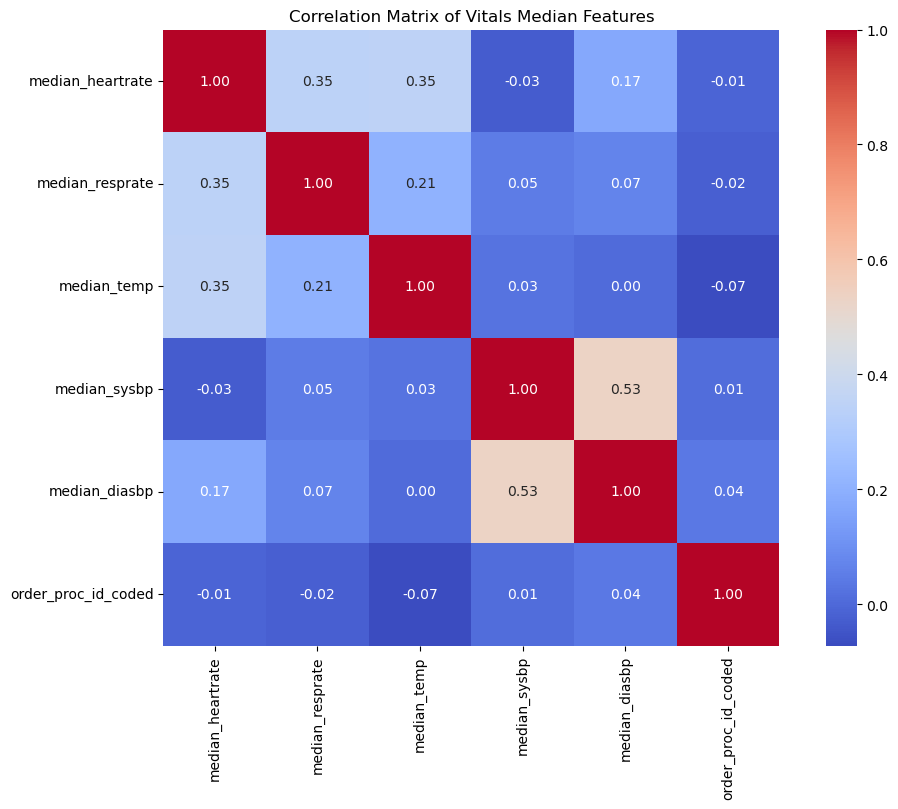

In [39]:
# visualize correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = vitals_median_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vitals Median Features')
plt.show()

## 🧪 Labs Data Exploration

This section covers the `labs` file, which contains laboratory results like white blood cell count, creatinine, procalcitonin, lactate, hemoglobin, and others. These biomarkers are crucial indicators of infection severity and systemic response.

### file : microbiology_cultures_labs.csv

## 👤 Demographics Data Exploration

Here we examine the `demographics` file, which includes patient-level attributes such as age, gender, and socioeconomic status (if available). These features help characterize patient risk profiles.

### file : microbiology_cultures_demographics.csv

## 🧫 Cohort & Culture Data Exploration

This section analyzes the `cohort` file, which includes culture orders, organisms identified, and antibiotic susceptibility results. It is the primary source for constructing the prediction label and understanding antibiotic effectiveness.

### file : microbiology_cultures_cohort.csv
